## 9.3.7 Задача о бродячем торговце

In [18]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [71]:
n = 15

coords = np.random.rand(n, 2)

def dist(i: int, j: int) -> np.float64:
    return np.linalg.norm(coords[i] - coords[j])

M = np.array([[dist(i, j) for j in range(n)] for i in range(n)])

C = {(0,): [np.inf for _ in range(n)]}
P = {(0,): [(0,) for _ in range(n)]}

C[(0,)][0] = 0
for size in range(1, n):
    for S in combinations(range(1, n), size):
        S = (0,) + S
        C[S] = [np.inf for _ in range(n)]
        P[S] = [(0,) for _ in range(n)]
        for i in S:
            if i != 0:
                for j in S:
                    if i != j:
                        S_i = tuple([k for k in S if k != i])
                        C[S][i] = np.min([C[S][i], C[S_i][j] + M[j][i]])
                        if C[S][i] == C[S_i][j] + M[j][i]:
                            P[S][i] = P[S_i][j] + (i,)
        if len(S) == n:
            ans, _ =  min([(C[S][i] + M[0][i], i) for i in range(n)])
            for i in range(n):
                if ans == C[S][i] + M[0][i]:
                    path = P[S][i]
                    break
ans, path

(3.6645040719214683, (0, 6, 10, 8, 11, 1, 14, 5, 9, 4, 13, 12, 3, 2, 7))

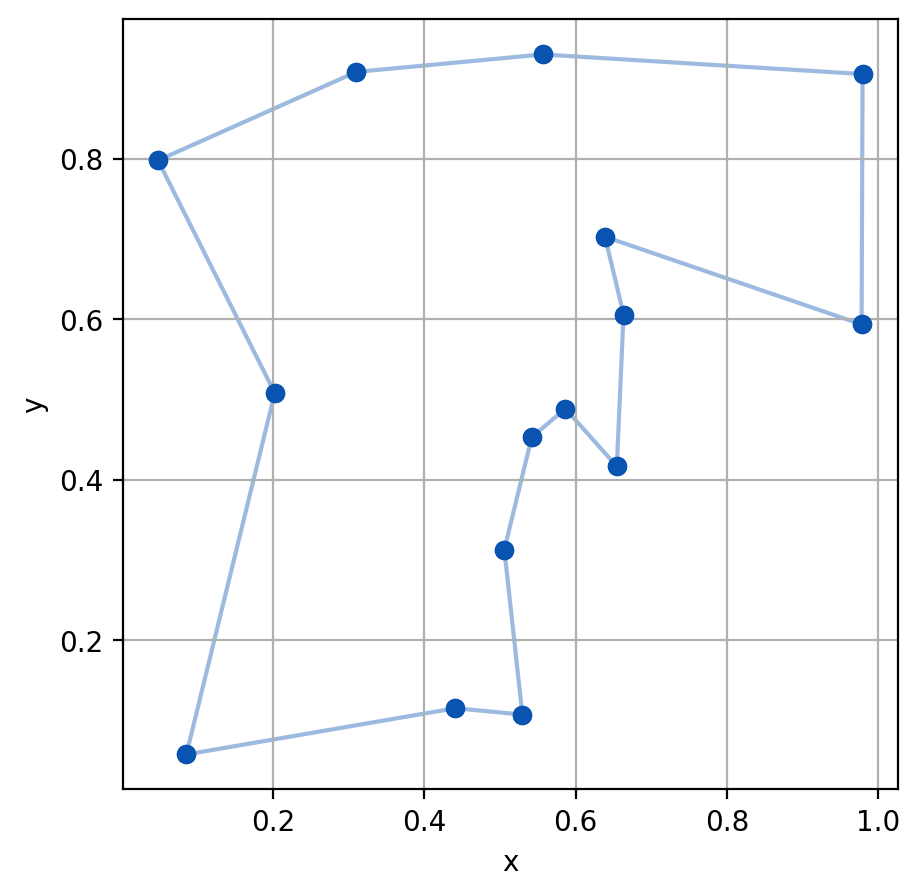

In [72]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
for k in range(n):
    i, j = (path[k], 0) if k == n-1 else (path[k], path[k+1])
    ax.plot([coords[i][0], coords[j][0]],
            [coords[i][1], coords[j][1]], alpha=0.4, color='#0954b1', zorder=1)
    ax.scatter(coords[i][0], coords[i][1], zorder=2, color='#0954b1')
    ax.scatter(coords[j][0], coords[j][1], zorder=2, color='#0954b1')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
plt.show()